
# Project:  Write a data science blog post

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#preparing">Preparing Data</a></li>
<li><a href="#posing_question">Posing Questions</a></li>
<li><a href="#analysing">Analysing,Modeling and Visualizing</a></li>
<li><a href="#communicating">Communicating Data insights</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data is from  Movie Database (TMDb) which contains info about different movies.The data contains several details about different parameters of the movie such as user ratings and revenue,budget,revenue,original_title,cast etc.This project is associated with using this dataset as input and draw meaningful observations.Finally communicating the observations to the people.


- **Importing the necessary libraries such as numpy and pandas for calculations and manipulations of the csv.For plotting matplotlib and seaborn has been imported**

In [126]:
# Import Statements
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


<a id='preparing'></a>
## Preparing Data

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

- **Reading the csv and viewing few rows to have a look at the dataframe**

In [127]:
df = pd.read_csv('tmdb-movies.csv')  # Reading the csv file
df.head(3)   # Viewing the first few columns

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


**Getting the Size of the data**

In [128]:
df.shape #Getting size

(10866, 21)

**Finding info about the data to get an estimate about the number of null values in diffrerent columns**

In [129]:
df.info() #getting info about different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**From the above result we can see there are certain columns which have null values such as imdb_id,cast,homepage,director,overview,production companies.So we need to drop those rows.**

**Getting a brief description about the dataset**

In [130]:
df.describe() # brief description

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Finding datatypes of different columns to check whether any coulnm has wrong datatype**


In [131]:
df.dtypes #column's datatype

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**As we can see above release date of of object type,which I guess is wrong.This should be of datetime type.So we need to convert it to the correct type**

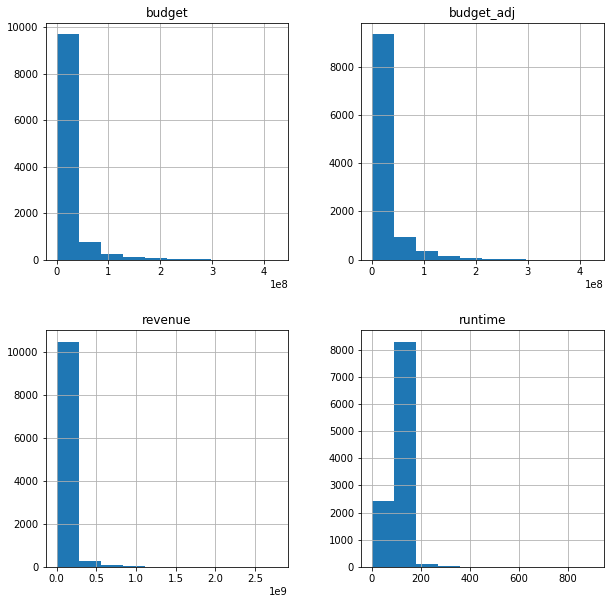

In [132]:
#Histogram for budget,runtime,revenue,budget_adj

a=df[['budget','runtime','revenue','budget_adj']].hist(figsize=(10,10));


- **The histograms above shows the different parameters such as budget,revenue,runtime,budget_adj for the movies listed in the dataframe.We can see that budget required to make a movie is around 0.5e8.Also we can see that runtime for average movies is 90-150 min**

### Data Cleaning 
#### Update the datatypes


- **Converting the data types into suitable types.Since date cannot be str type.so we convert it top datetime type.**

In [133]:
#converting the data types into suitable types

df['release_date'] = pd.to_datetime(df['release_date'])

#### Droping columns
- **We drop all the columns which we do not need for any manupulations i.e from which data we cannot make out any thing.**

In [134]:
#creating a list of columb to be deleted
delete_col=[ 'imdb_id','revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies','tagline']

#deleting the un-necessary columns
df= df.drop(delete_col,1)

#Viewing the new dataset
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08


#### We check if our data contains some duplicates & null values.If such values are found we remove them because if we try working on incomplete data we might end up getting reverse result than expected.


In [135]:
#checking for the duplicate rows
sum(df.duplicated())

1

**The out 1 indicates that there one duplicate row in the dataframe which we need to remove.**

In [136]:
#Removing the duplicate rows
df.drop_duplicates(keep= 'last',inplace = True)

**Looking for the number of rows having null values**

In [137]:
df.isnull().sum().sort_values(ascending = False)

cast              76
director          44
genres            23
budget_adj         0
release_year       0
vote_average       0
vote_count         0
release_date       0
runtime            0
original_title     0
revenue            0
budget             0
popularity         0
id                 0
dtype: int64

**Dealing with missing values- We drop the rows having missing values as it can lead to ambiguous results.**

In [138]:
# Droping rows having missing values
df.dropna(axis = 0, how ='any',inplace = True)
df.shape

(10731, 14)

 ### Removing 0's from budget and the revenue columns
 - **We remove rows with 0 in the the revenue or budget coulmn as either the budget of the revenue cannot be 0.If it has been mentione as 0 that means there is some ambiguity with that data.So it's better to remove that.**

- **Creating a seperate list of revenue and budget column**
- **This will replace all the value from '0' to NAN in the list**
- **Removing all the row which has NaN value in temp_list** 


In [139]:
remove_list=['budget', 'revenue']
df[remove_list] = df[remove_list].replace(0, np.NAN)
df.dropna(subset = remove_list, inplace = True)




In [140]:
df['genres'].str[:].head(10)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

**Diffrent genres mentioned for the movies can be Action,adventure,Science Fiction,Thriller,Drama etc.**

<a id='posing_question'></a>
## Posing Questions



<ol>
  
  **<li>Which are the Highest grossing movie each year and its genre ?</li>**
  **<li>What is the average Movie duration, longest and shortest movies?</li>**
  **<li>Run time of different movies ?</li>**
  **<li>Most popular and least popular movie and its genre ?</li>**
  **<li>Number of movies release each year ?</li>**

</ol>

<a id='analysing'></a>
## Analysing Modelling and Visualizing


### Which are the Highest grossing movie each year and its genre ?

- **In order to find the highest grossing movie,We first sort the dataframe based on revenue.**
- **Then we groupby 'release year' so that we get the highest revenue for each movie for that particular year.**


In [158]:
##sorting the dataframe based on revenue and then grouping by release years.

sorted_df=df.sort_values(['revenue'],ascending=False)
grouped_by_year=sorted_df.groupby('release_year').head(1)[['release_year','revenue','original_title','genres']].sort_values(['release_year']).set_index('release_year')
grouped_by_year.sort_values(['revenue']).tail(10).sort_values(['revenue'],ascending=False)

,revenue,original_title,genres
release_year,,,
2009,2.781506e+09,Avatar,Action|Adventure|Fantasy|Science Fiction
2015,2.068178e+09,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy
1997,1.845034e+09,Titanic,Drama|Romance|Thriller
2012,1.519558e+09,The Avengers,Science Fiction|Action|Adventure
2011,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Adventure|Family|Fantasy
2013,1.274219e+09,Frozen,Animation|Adventure|Family
2003,1.118889e+09,The Lord of the Rings: The Return of the King,Adventure|Fantasy|Action
1995,1.106280e+09,The Net,Crime|Drama|Mystery|Thriller|Action
2006,1.065660e+09,Pirates of the Caribbean: Dead Man's Chest,Adventure|Fantasy|Action


**Then we plot the grouped_by_year dataframe which contains the 'release_year' and the highest revenue for that year**

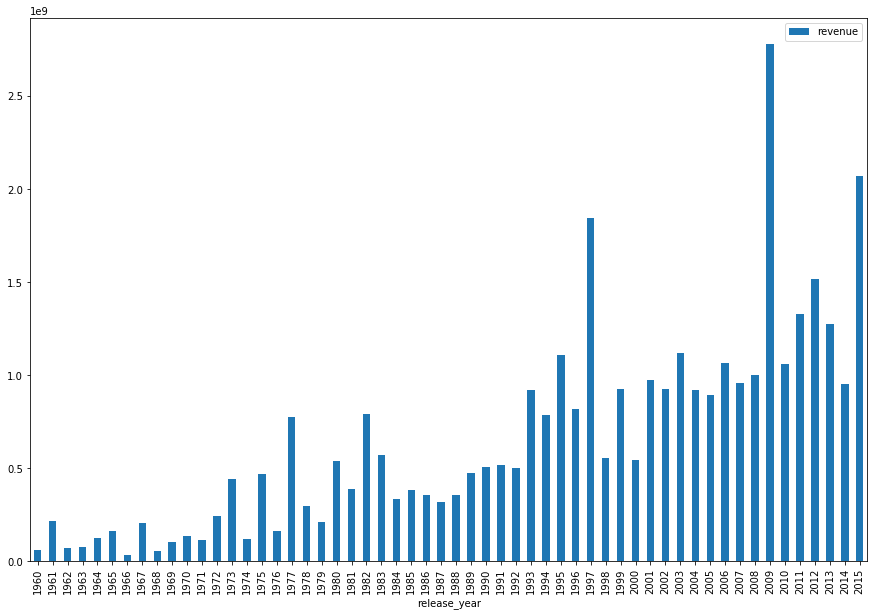

In [142]:
grouped_by_year.plot.bar(figsize=(15,10),legend='revenue',);

- **From the plot above we can see the revenue generated by movies has been increasing in successiuve years.In the year 2009 max revenue was generated** 

### 2 What is the average Movie duration, longest and shortest movies?

**To find the average movie duration we find the mean of the 'runtime' column from the TMDb dataframe**

In [143]:
def avg_runtime(column):
    """
     calculates the average time
    
    """
    run_time= df[column].mean()
    return run_time



avg_runtime('runtime')

109.21745908028059

- **To find maximum run time we apply max() method on the 'runtime' column**
- **Then we fetch that particular row using the loc[] method**
- **Finally we display the required columns.**

In [144]:
#Max run time and min run time
Longest_duration=df['runtime'].max()
df.loc[(df['runtime'] == Longest_duration),['runtime','original_title']]

,runtime,original_title
2107,338,Carlos


- **To find maximum run time we apply min() method on the 'runtime' column**
- **Then we fetch that particular row using the loc[] method**
- **Finally we display the required columns.**

In [145]:
#Min run time and min run time
shortest_duration=df['runtime'].min()
df.loc[(df['runtime'] == shortest_duration),['runtime','original_title']]

,runtime,original_title
5162,15,Kid's Story


### 3  Run time of different movies ?

- **Here we make histogram for the rumtime to analyse the runtime for different movies.**

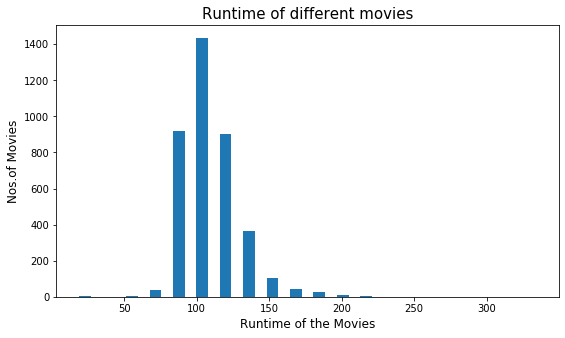

In [146]:
plt.figure(figsize=(9,5))

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 12)
#On y-axis 
plt.ylabel('Nos.of Movies', fontsize=12)
#Name of the graph
plt.title('Runtime of different movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.5,bins =20)
#displays the plot
plt.show()

**The histogram above shows that generally movies runtime is 90-150 min**

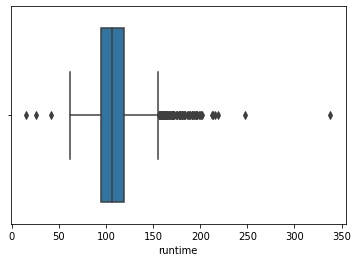

In [147]:
##Box plot for runtime
sns.boxplot(df["runtime"]);


- **A box plot is added additionally to have better visualisation.**

### 4  Most popular and least popular movie ?


**Most popular movie**

- **To find the most popular movie first we find the maximum value from the popularity column.The we fetch the row corresponding to that value.Then finally we get the name of the movie from that row.**

In [166]:
# most popular movie
df[['popularity','original_title','genres']].sort_values('popularity',ascending=False).head()


,popularity,original_title,genres
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
629,24.949134,Interstellar,Adventure|Drama|Science Fiction
630,14.311205,Guardians of the Galaxy,Action|Science Fiction|Adventure
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller


**From the result above we can see that Jurassic World has highest rating.**

**Least popular movie**

- **To find the least popular movie first we find the minimum value from the popularity column.The we fetch the row corresponding to that value.Then finally we get the name of the movie from that row.**

In [168]:
##Least popular movie
df[['popularity','original_title','genres']].sort_values('popularity').head(1)


,popularity,original_title,genres
7268,0.001117,Born into Brothels,Documentary


**From the result above we can see that Born into Brothels has least rating.**

### 5  Number of movies release each year ?

- **We have to first groupby the dataframe by 'release_year'**
- **Then we count the number of Ids under the 'id' column to count the number of movies.**
- **Finally we plot the values using bar plot.**

In [150]:
#grouping by release_year and then counting the number of id under each year for number of movies released.
grouped_to_count=df.groupby('release_year').count()['id']

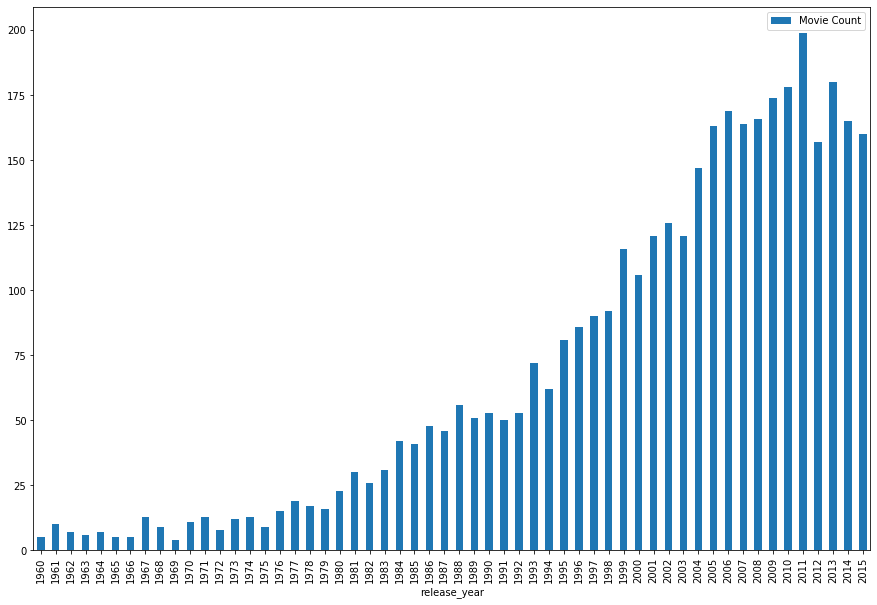

In [151]:
grouped_to_count.plot.bar(figsize=(15,10),legend='Movie Count',label='Movie Count');

- **From the plot above we can conclude that Number of movies released has increased over the years,with maximum number of movies released in the year 2011**

<a id='conclusions'></a>
## Conclusions




- **Overall analysis**

    - **Initially the dataset contained 10866 rows in total but there were several rows which contained null values,after removing those rows I was left with 10731.The I removed all the unnecessary coulumns.After wrangling and cleaning the data I did my over all analysis and found that:-** 

    - **Number of movies released has increased over the years,with maximum number of movies released in the year 2011**

    - **Frequent Runtimes are from 90 sec to 150 min**

    - **Average movie duration is 109.2 min**

    - **By revenue generated**
        - Highest grossing movie is Avtar released in the year 2009.

        - Lowest grossing movie is Who's Afraid of Virginia Woolf released in the year 1966.<br>
    - **Number of movies release each year**

        - Maximum number of movies released in the year 2014 ie 700

        - Minimum number of movies released in the year 1961 and 1969 ie 31.<br>
    - **Based on runtime**
        - Shortest Movie =Kid's Story
        - Longest Movie  =Carlos
    - **Based on popularity**
        - Most popular  =Jurassic world
        - Least popular =Born into brothels
        

